In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read file into pandas

mushrooms = pd.read_table('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', sep= ",", header = None)

In [4]:
mushrooms.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mushroomsrel = mushrooms[[0, 5, 22]]
mushroomsrel.head()

,0,5,22
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g


In [6]:
#Rename all columns

mushroomsrel.rename(columns={0 :'Poisionous/edible', 5 : 'Odor', 22 : 'Habitat'}, inplace=True)
mushroomsrel.columns

C:\Users\Trissy\Anaconda3\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


Index(['Poisionous/edible', 'Odor', 'Habitat'], dtype='object')

In [7]:
mushroomsrel.head()

,Poisionous/edible,Odor,Habitat
0,p,p,u
1,e,a,g
2,e,l,m
3,p,p,u
4,e,n,g


In [8]:
#Convert codes to numerical values - for Poisionous/edible column 0 - edible and 1 - poisionous

#Original key values for Odor - almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s

#Changed key values - almond=200, anise=300,creosote=400,fishy=500,foul=600, musty=700,none=800,pungent=900,spicy=1000

#Original key values for Habitat -  grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


mushroomsrel.replace(to_replace={"Poisionous/edible":{'p': 1, 'e': 0}}, inplace=True)
mushroomsrel.replace(to_replace={"Odor":{'a': 200, 'l': 300,'c': 400, 'y': 500, 'f': 600, 'm': 700, 'n': 800, 'p': 900, 's': 1000}}, inplace=True)
mushroomsrel.replace(to_replace={"Habitat":{'g': 20, 'l': 30,'m': 40, 'p': 50, 'u': 60, 'w': 70, 'd': 80}}, inplace=True)




C:\Users\Trissy\Anaconda3\lib\site-packages\pandas\core\generic.py:3378: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=False, regex=regex)


In [9]:
#New values
mushroomsrel.head()


,Poisionous/edible,Odor,Habitat
0,1,900,60
1,0,200,20
2,0,300,40
3,1,900,60
4,0,800,20


In [10]:
%matplotlib inline

In [11]:
#Exploratory data analysis
#1. Quantity of mushrooms that are poisonous and edible 0- edible, 1- poisionous
mushroomsrel['Poisionous/edible'].value_counts()

0    4208
1    3916
Name: Poisionous/edible, dtype: int64

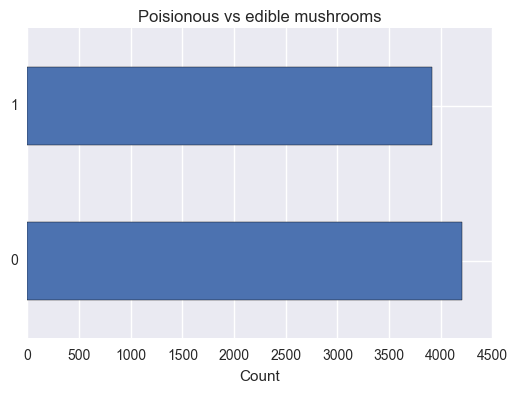

In [12]:
#2. Plot a histogram to show comparison
mushroomsrel['Poisionous/edible'].value_counts().plot(kind='barh')
plt.title('Poisionous vs edible mushrooms')
plt.xlabel('Count')


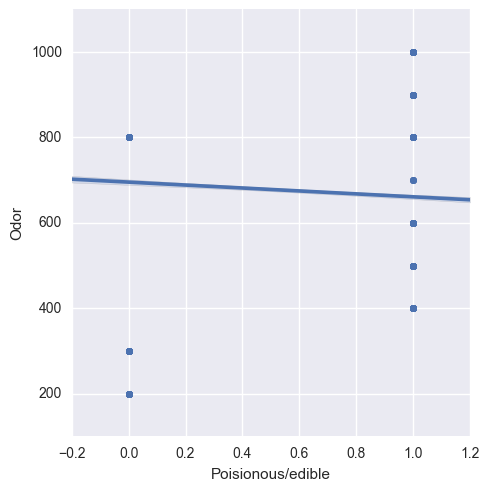

In [13]:
#3. Seaborn plot of odor vs poisonous/edible 

sns.lmplot("Poisionous/edible", 'Odor', data=mushroomsrel, fit_reg=True)


The plot shows that most poisionous mushrooms have an odor. For example, if a mushroom has a spicy(1000) odor it is more likely to be poisionous. 
If it has an almond odor(200), it is more likely to be edible. Some mushrooms have no odor and can be either spicy or edible(800) 

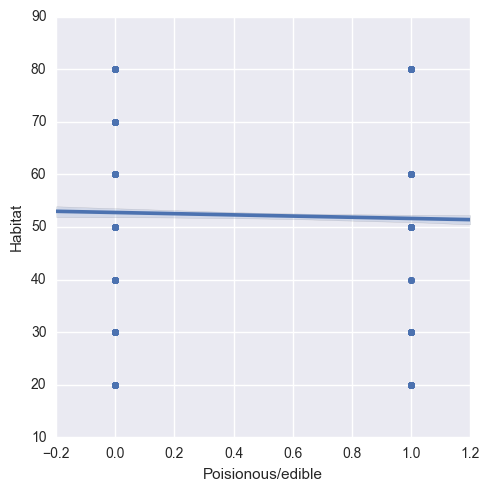

In [17]:
#4. Seaborn plot of poisonous/edible vs habitat 
sns.lmplot("Poisionous/edible", "Habitat", data=mushroomsrel, fit_reg=True)

For this plot, it seems that regardless of if a mushroom is edible or poisionous, they are likely to be found
in the same place. The only notable difference is the waste habitat(70) which seems to only have edible mushrooms. 